In [47]:
# importing nessacary package

import pandas as pd
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns

In [ ]:
pwd

In [48]:
# loading dataset
file = 'Autism_Data_Adult_Version.csv'
df = pd.read_csv(file)
df.head(5)
#df.drop(columns="Used_App_Before","user")

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO


# preprocessing the data now

In [60]:
#reshape the data
X =df.drop(columns=["Class","User","Used_App_Before","Case No","Score","Residence","Screening Type","Language","Ethnicity"])
y =df[['Class']].values.reshape(-1,1)
print(X.shape, y.shape)

(1118, 14) (1118, 1)


In [ ]:
df.head()

# train, test, split
from sklearn.model_selection import train_test_split

# trying to create 2nd model using less only selcect features TODO

In [ ]:
#diff_model = pd.get_dummies(df, prefix=['Family_ASD'], columns=['Family_ASD'])
#diff_model.head()                                   

# pd.get_dummies(df, prefix=['A', 'D'], columns=['A', 'D'])                                       

In [61]:
# use get dummies to turn catagorical data into 0 and 1 for machine learning
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pd.set_option('display.max_columns', None)
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex_f,Sex_m,Jaundice _no,Jaundice _yes,Family_ASD_no,Family_ASD_yes
361,1,1,0,0,0,0,0,0,0,1,20,0,1,1,0,1,0
1051,1,0,1,0,0,0,1,0,0,0,52,0,1,1,0,1,0
533,0,1,1,0,1,0,0,1,0,0,27,0,1,1,0,1,0
898,1,0,0,1,0,1,1,1,1,1,26,1,0,1,0,1,0
583,1,1,0,1,1,0,0,0,0,0,29,0,1,1,0,1,0


In [62]:
# second model using less features
#X_2 = pd.get_dummies(df,columns=('Family_ASD_no','Family_ASD_yes'))
df

,Case No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Ethnicity,Jaundice,Family_ASD,Residence,Used_App_Before,Score,Screening Type,Language,User,Class
0,6,0,0,0,0,0,0,0,0,0,0,27,f,white,no,no,Russia,no,0,17 and more,russian,parent,NO
1,10,1,1,1,1,1,1,1,1,1,1,21,f,white,no,no,Germany,no,10,17 and more,english,self,YES
2,12,1,1,0,1,1,0,0,1,0,0,18,m,black,no,no,United States,no,5,17 and more,english,self,NO
3,16,1,0,0,0,1,1,1,1,1,1,49,m,black,no,no,Mexico,no,7,17 and more,french,self,YES
4,20,1,1,1,0,0,0,0,1,0,0,18,m,aboriginal,no,no,Indonesia,no,4,17 and more,english,self,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1113,2486,0,1,1,0,0,0,0,0,0,0,51,f,white,no,yes,New Zealand,no,2,17 and more,english,self,NO
1114,2487,1,1,1,1,1,1,1,1,1,1,43,m,white,no,no,United Kingdom,no,10,17 and more,english,self,YES
1115,2489,1,0,0,0,0,0,1,1,1,1,43,m,white,yes,yes,United Kingdom,no,5,17 and more,english,self,NO
1116,2492,1,1,0,1,1,1,0,1,0,1,21,f,white,no,no,United States,no,7,17 and more,english,self,YES


In [63]:
# y_train = pd.get_dummies(y_train)

# Logistic Regression

In [64]:
# trying a logistic regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
# using classifier for logitic regression

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
# checking training vs testing score

print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9940334128878282
Testing Data Score: 0.9892857142857143


In [67]:
# checking how accuret predictions are

predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['YES' 'NO' 'NO' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES']
First 10 Actual labels: [['YES'], ['NO'], ['NO'], ['YES'], ['YES'], ['NO'], ['NO'], ['YES'], ['NO'], ['YES']]


In [68]:
#predictions, y_test
from sklearn.metrics import confusion_matrix as cm
predictions, y_test
cm = cm(y_test, predictions)
cm

array([[176,   2],
       [  1, 101]], dtype=int64)

In [69]:
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex_f,Sex_m,Jaundice _no,Jaundice _yes,Family_ASD_no,Family_ASD_yes
361,1,1,0,0,0,0,0,0,0,1,20,0,1,1,0,1,0
1051,1,0,1,0,0,0,1,0,0,0,52,0,1,1,0,1,0
533,0,1,1,0,1,0,0,1,0,0,27,0,1,1,0,1,0
898,1,0,0,1,0,1,1,1,1,1,26,1,0,1,0,1,0
583,1,1,0,1,1,0,0,0,0,0,29,0,1,1,0,1,0


Feature: A1, Score: 1.71106
Feature: A2, Score: 1.69557
Feature: A3, Score: 1.77314
Feature: A4, Score: 1.72446
Feature: A5, Score: 2.25515
Feature: A6, Score: 2.06847
Feature: A7, Score: 1.81643
Feature: A8, Score: 1.52633
Feature: A9, Score: 2.09432
Feature: A10, Score: 1.46125
Feature: Age, Score: -0.03703
Feature: Sex_f, Score: -1.94363
Feature: Sex_m, Score: -2.14414
Feature: Jaundice _no, Score: -2.28155
Feature: Jaundice _yes, Score: -1.80623
Feature: Family_ASD_no, Score: -2.42484
Feature: Family_ASD_yes, Score: -1.66293


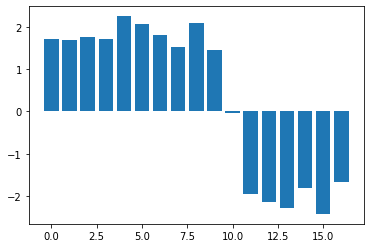

In [70]:
# find feature importance using classifier coeffiant

#print(classifier.coef_[0])
importance = classifier.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (X_train.columns[i],v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# debug
plt.heat([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
# debug
ax = sns.heatmap([x for x in range(len(importance))], importance)
plt.show()

In [37]:
# look at df for referance
X_train.head(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex_f,Sex_m,Ethnicity_aboriginal,Ethnicity_asian,Ethnicity_black,Ethnicity_hispanic,Ethnicity_latino,Ethnicity_middle eastern,Ethnicity_others,Ethnicity_south asians,Ethnicity_white,Jaundice _no,Jaundice _yes,Family_ASD_no,Family_ASD_yes,Residence_Afghanistan,Residence_AmericanSamoa,Residence_Angola,Residence_Antigua and Barbuda,Residence_Argentina,Residence_Armenia,Residence_Aruba,Residence_Australia,Residence_Austria,Residence_Azerbaijan,Residence_Bahamas,Residence_Bahrain,Residence_Bangladesh,Residence_Belgium,Residence_Bolivia,Residence_Brazil,Residence_Burundi,Residence_Canada,Residence_Chile,Residence_China,Residence_Costa Rica,Residence_Croatia,Residence_Cyprus,Residence_Czech Republic,Residence_Denmark,Residence_Djibouti,Residence_Ecuador,Residence_Egypt,Residence_Ethiopia,Residence_Finland,Residence_France,Residence_French Guiana,Residence_Germany,Residence_Honduras,Residence_Hong Kong,Residence_Hungary,Residence_Iceland,Residence_India,Residence_Indonesia,Residence_Iran,"Residence_Iran, Islamic Republic of",Residence_Iraq,Residence_Ireland,Residence_Italy,Residence_Japan,Residence_Jordan,Residence_Kazakhstan,Residence_Lebanon,Residence_Malaysia,Residence_Mexico,Residence_Nepal,Residence_Netherlands,Residence_New Zealand,Residence_Nicaragua,Residence_Niger,Residence_Norway,Residence_Oman,Residence_Pakistan,Residence_Peru,Residence_Philippines,Residence_Poland,Residence_Portugal,Residence_Qatar,Residence_Romania,Residence_Russia,Residence_Saint Kitts and Nevis,Residence_Saudi Arabia,Residence_Serbia,Residence_Sierra Leone,Residence_Singapore,Residence_South Africa,Residence_Spain,Residence_Sri Lanka,Residence_Sweden,Residence_Switzerland,Residence_Taiwan,Residence_Thailand,Residence_Tonga,Residence_Turkey,Residence_Turkmenistan,Residence_Ukraine,Residence_United Arab Emirates,Residence_United Kingdom,Residence_United States,Residence_Uruguay,Residence_Viet Nam,"Residence_Virgin Islands, U.S.",Residence_Zambia,Screening Type_17 and more,Language_arabic,Language_english,Language_farsi,Language_french,Language_mandarin,Language_portuguese,Language_russian,Language_spanish,Language_swahili,Language_turkish,Language_urdu
361,1,1,0,0,0,0,0,0,0,1,20,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0


Feature: 0, Score: -0.00044
Feature: 1, Score: 0.26956
Feature: 2, Score: 0.02292
Feature: 3, Score: 0.12357
Feature: 4, Score: 0.04944
Feature: 5, Score: 0.57534
Feature: 6, Score: 0.42091
Feature: 7, Score: 0.33366
Feature: 8, Score: -0.18006
Feature: 9, Score: 0.54142
Feature: 10, Score: -0.06787
Feature: 11, Score: -0.05221
Feature: 12, Score: 2.08889
Feature: 13, Score: -1.45116
Feature: 14, Score: -1.47356
Feature: 15, Score: -0.19474
Feature: 16, Score: -0.69760
Feature: 17, Score: -0.23708
Feature: 18, Score: 0.02246
Feature: 19, Score: -0.41724
Feature: 20, Score: -1.29418
Feature: 21, Score: 0.18371
Feature: 22, Score: -0.28504
Feature: 23, Score: -0.00477
Feature: 24, Score: -1.76512
Feature: 25, Score: -1.15960
Feature: 26, Score: -1.93062
Feature: 27, Score: -0.99410
Feature: 28, Score: -0.39106
Feature: 29, Score: -0.01149
Feature: 30, Score: -0.08371
Feature: 31, Score: 0.00091
Feature: 32, Score: -0.27255
Feature: 33, Score: -0.00226
Feature: 34, Score: -0.00035
Feature

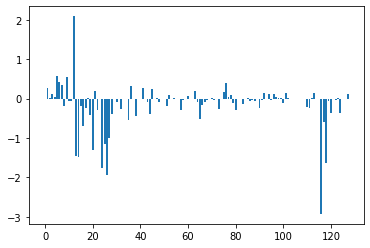

In [96]:
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [72]:
# at long last, here is the data frame of the confusion matrix
confusion_m= pd.DataFrame(cm)
confusion_m

,0,1
0,176,2
1,1,101


In [77]:
# stack df
confusion = confusion_m.stack().to_frame().T
confusion

0     1     
     0  1  0    1
0  176  2  1  101

In [78]:
# rename columns
confusion.columns = ['True_Positive', 'False_Positive', 'False_Negative','True_Negaitive']
confusion

,True_Positive,False_Positive,False_Negative,True_Negaitive
0,176,2,1,101


In [ ]:
#df.transpose()


In [ ]:
# plot
df.plot()

In [79]:
test = pd.DataFrame({'result':['True_Positive', 'False_Positive', 'False_Negaitive','True_Neg'], 'count':[173, 5, 3,99]})
test

,result,count
0,True_Positive,173
1,False_Positive,5
2,False_Negaitive,3
3,True_Neg,99


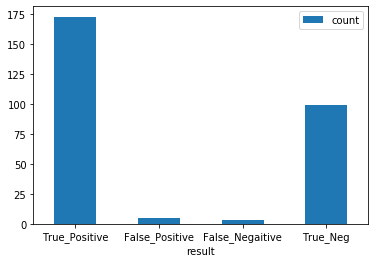

In [80]:
ax = test.plot.bar(x='result', y='count', rot=0)

In [ ]:
X_train.shape

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix as cm

#tn, fp, fn, tp = cm(y_test, rf.predict(X_test)).ravel()
#tn

tn, fp, fn, tp = cm(y_test,predictions).ravel()
#tn
#fp

cm(y_test, predictions)






# trees model

In [ ]:
target = df["Class"]
target_names = ["negative", "positive"]